In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D://Datasets//pos_neg.csv")

In [4]:
df.head()

,review,sentiment
0,"b""I went and saw this movie last night after b...",pos
1,b'Actor turned director Bill Paxton follows up...,pos
2,b'As a recreational golfer with some knowledge...,pos
3,"b""I saw this film in a sneak preview, and it i...",pos
4,b'Bill Paxton has taken the true story of the ...,pos


In [5]:
df.shape

(50000, 2)

In [6]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
neg        25000  24698  b'I see that C. Thomas Howell has appeared in ...   
pos        25000  24884  b"Loved today's show!!! It was a variety and n...   

                
          freq  
sentiment       
neg          3  
pos          5

In [7]:
df['length'] = df.review.apply(len)

In [8]:
df.head()

,review,sentiment,length
0,"b""I went and saw this movie last night after b...",pos,797
1,b'Actor turned director Bill Paxton follows up...,pos,2012
2,b'As a recreational golfer with some knowledge...,pos,1442
3,"b""I saw this film in a sneak preview, and it i...",pos,685
4,b'Bill Paxton has taken the true story of the ...,pos,1219


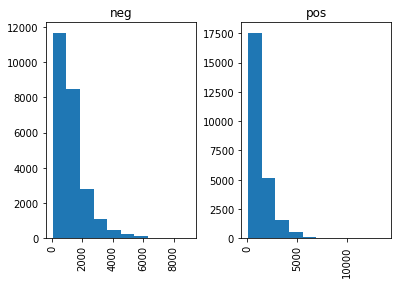

In [9]:
df.hist(column='length', by='sentiment')
plt.show()

In [10]:
import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def clean_text(text):
    no_punc = [s for s in text if s not in string.punctuation]
    no_punc = ''.join(no_punc)
    rm_words = [w for w in no_punc.split() if w.lower() not in stop_words]
    return ' '.join(rm_words)

In [11]:
df['review'] = df.review.apply(clean_text)

In [12]:
df.head()

,review,sentiment,length
0,bI went saw movie last night coaxed friends mi...,pos,797
1,bActor turned director Bill Paxton follows pro...,pos,2012
2,bAs recreational golfer knowledge sports histo...,pos,1442
3,bI saw film sneak preview delightful cinematog...,pos,685
4,bBill Paxton taken true story 1913 US golf ope...,pos,1219


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [15]:
tdv = TfidfVectorizer()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size=0.2, random_state=42)

In [18]:
text_trans = tdv.fit_transform(X_train)

In [19]:
text_trans.shape

(40000, 164692)

In [20]:
from sklearn.naive_bayes import MultinomialNB 
mn = MultinomialNB()

In [21]:
mn.fit(text_trans,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
mn.score(text_trans,y_train)

0.91745

## prediction

In [23]:
X_test.head()

33553    bI taken film friend sceptical Swedish film su...
9427     bThis trash version Romeo Juliet passes Manhat...
199      bThere lot like film despite humble trappings ...
12447    bPeople often uncomfortable Merchant Venice du...
39489    bI dont get movie obviously pretty good budget...
Name: review, dtype: object

In [24]:
test_transform = tdv.transform(X_test)

In [25]:
test_transform.shape

(10000, 164692)

In [27]:
y_pred = mn.predict(test_transform)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
accuracy_score(y_test, y_pred)

0.8654

In [31]:
confusion_matrix(y_test, y_pred)

array([[4361,  584],
       [ 762, 4293]], dtype=int64)